<a href="https://colab.research.google.com/github/Dietrich061991/Analyse-Weight-USA-BRA-CAN-2016-Olympics-in-Rio-de-Janeiro/blob/master/Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Desafio 4**
Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o data set 2016 Olympics in Rio de Janeiro(https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse data set conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (height) e peso (weight). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

Obs.: Por favor, não modifique o nome das funções de resposta. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm


Inicia sua análise a partir daqui

In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!ls "/content/drive/My Drive/olympic-games"

athletes.csv  countries.csv  events.csv


In [0]:
def get_sample(df, col_name, n=200, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 200.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_id = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_id, col_name]

In [13]:
df =  pd.read_csv ('/content/drive/My Drive/olympic-games/athletes.csv',delimiter=',')
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0



**Questão 1**
Considerando uma amostra de tamanho 3000 da coluna height obtida com a função get_sample(), execute o teste de normalidade de Shapiro-Wilk com a função scipy.stats.shapiro(). Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (True ou False).

**Documentation** teste de normalidade de Shapiro-Wilk com a função scipy.stats.shapiro() https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [14]:
#retirando a amostra que se encontra na coluna height
height = get_sample(df,'height',n=3000)

#calculando o teste de normalidade das amostras
shapiro_wilk= sct.shapiro(height)
shapiro_wilk


(0.9961519837379456, 5.681722541339695e-07)

**Calculo da mediana/mean/moda das Amostras**

**Mediana:** o número do centro; é encontrado ordenando-se todos os dados e escolhendo o que está no centro (ou, se houver dois números no centro, calculando-se a média desses dois números)

In [15]:

height.median()

1.76

**Média:** o número "médio"; é encontrado somando-se todos os dados e dividindo pelo número de dados

In [16]:
height.mean()

1.766779999999997

**Moda:** o número mais frequente — ou seja, o número que aparece o maior número de vezes.

In [17]:
height.mode()

0    1.8
dtype: float64

**obs:** Meu valor (p-valor) é inferior ao (Alpha) entao o test de normalidade deve ser rejeitado. lembrando que o meu alpha = 0.05

Documentation sobre p-valor https://pt.wikipedia.org/wiki/Valor-p


In [22]:
alpha = 0.05
shapiro_wilk[1] > alpha

False

**Para refletir:**

Plote o histograma dessa variável (com, por exemplo, bins=25). A forma do gráfico e o resultado do teste são condizentes? Por que?
Plote o qq-plot para essa variável e a analise.
Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado p-value hacking, e não é legal).

In [0]:
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(10, 7)
sns.set()

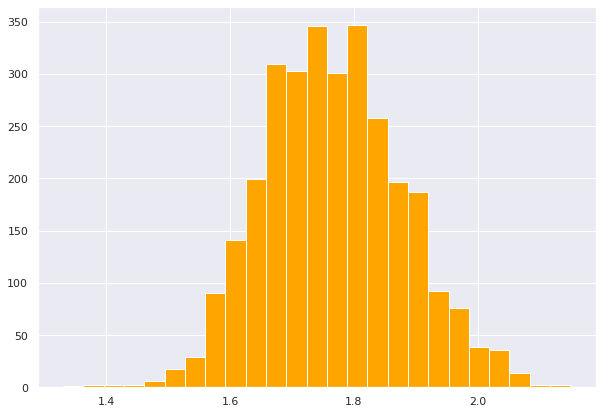

In [24]:
plt.hist(height, bins = 25, color = "orange")
plt.show()

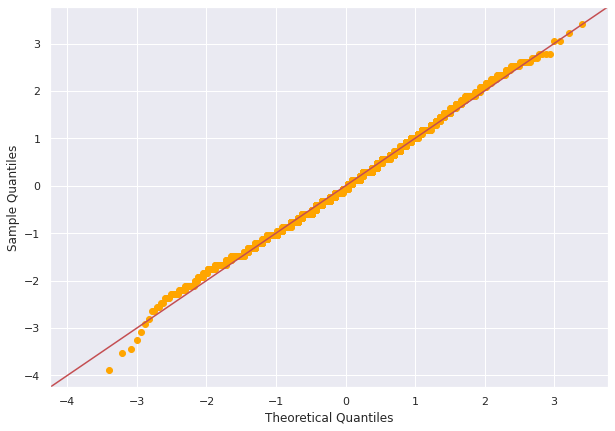

In [25]:
sm.qqplot(height, fit=True, line="45",color = "orange");

**Resposta question 1**

In [26]:
def q1():
    height = get_sample(df,'height',n=3000)
    shapiro_wilk = sct.shapiro(height)
    alpha = 0.05
    return shapiro_wilk[1] > alpha

q1()

False

***                  O que podemos tirar como conclusao na question 1 ? Podemos observar uma distribuiçao anormal das amostras da altura dos atletas***

**Questão 2**
Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função scipy.stats.jarque_bera(). Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (True ou False).

**Documentation** Jarque-Bera através da função scipy.stats.jarque_bera(). https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html

In [27]:
Jarque_Bera = sct.jarque_bera(height)
Jarque_Bera

(13.03363513594265, 0.001478366424594868)

In [28]:
Jarque_Bera[1] > alpha

False

**Resposta question 2**

In [29]:
def q2():
    height = get_sample(df,'height',n=3000)
    Jarque_Bera = sct.jarque_bera(height)
    alpha = 0.05
    return Jarque_Bera[1] > alpha

q2()

False

**O que podemos tirar como conclusao na question 2 ? Podemos observar uma distribuiçao anormal das amostras da altura dos atletas**

**Questão 3**
Considerando agora uma amostra de tamanho 3000 da coluna weight obtida com a função get_sample(). Faça o teste de normalidade de D'Agostino-Pearson utilizando a função scipy.stats.normaltest(). Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (True ou False).

**Documentation**  teste de normalidade de D'Agostino-Pearson utilizando a função scipy.stats.normaltest() https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [30]:
Weight = get_sample(df,'weight',n=3000)
test_norm = sct.normaltest(Weight)
test_norm

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

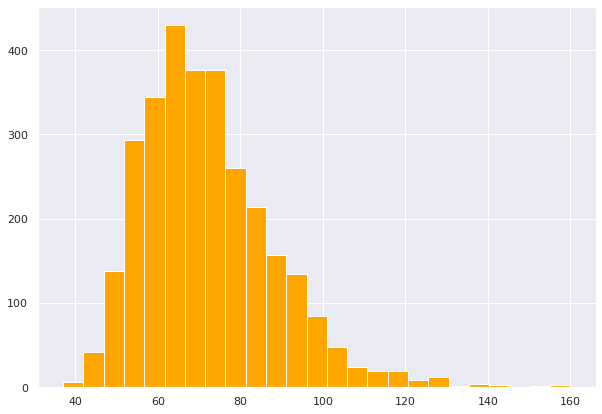

In [31]:
plt.hist(Weight, bins=25, color = "orange")
plt.show()

In [0]:
sm.qqplot(Weight, fit=True, line="45", color = "orange");

In [32]:
def q3():
    Weight = get_sample(df,'weight',n=3000)
    test_norm = sct.normaltest(Weight)
    alpha = 0.05
    return test_norm[1] > alpha

q3()

False

**Podemos observar uma distribuiçao anormal no qqplot**

**Questão 4**
Realize uma transformação logarítmica em na amostra de weight da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (True ou False).

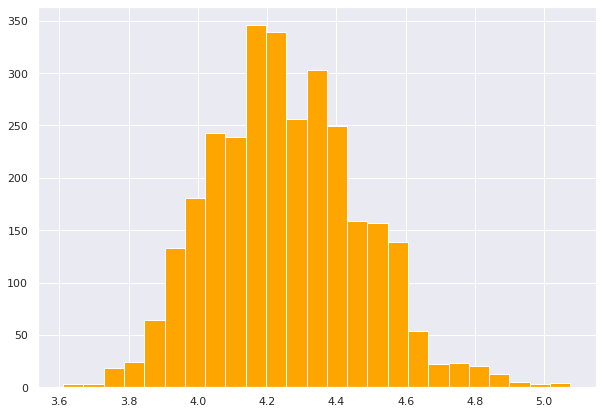

In [36]:
Weight_transfor = np.log(Weight)
plt.hist(Weight_transfor, bins=25,color = "orange")
plt.show()

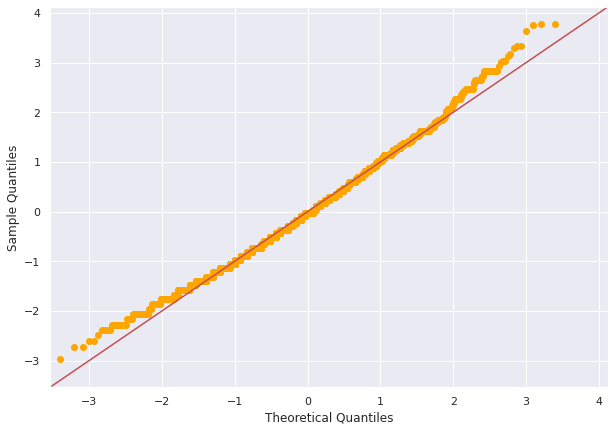

In [35]:
sm.qqplot(Weight_transfor, fit=True, line="45",color = "orange");

In [37]:

test = sct.normaltest(Weight_transfor)
test

NormaltestResult(statistic=45.91534331977353, pvalue=1.0705572101256944e-10)

In [38]:

alpha = 0.05
test[1] > alpha

False

**Resposta question 4**

In [41]:
def q4():
    Weight = get_sample(df,'weight',n=3000)
    Weight_transfor = np.log(Weight)
    test = sct.normaltest(Weight_transfor)
    alpha = 0.05
    return test[1] > alpha

q4()

False

Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%.

**Questão 5**
Obtenha todos atletas brasileiros, norte-americanos e canadenses em DataFrames chamados bra, usa e can,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (height) para amostras independentes e variâncias diferentes com a função scipy.stats.ttest_ind() entre bra e usa. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (True ou False).

**Documentation** função scipy.stats.ttest_ind() https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

**Vamos filtrar as  nacionalidades dos USA BRA E CAN e calcular a media das alturas**

In [0]:

brasil = df[df.nationality == "BRA"]
Estados_unidos = df[df.nationality == "USA"]
canada = df[df.nationality == "CAN"]

**Calulo da media das alturas**

In [44]:
media_Altura_brasi = brasil.height.mean()
media_Altura_brasi

1.764033613445379

In [45]:
media_Altura_usa = Estados_unidos.height.mean()
media_Altura_usa

1.7877678571428557

In [46]:
brasil_contra_usa = sct.ttest_ind(brasil.height, Estados_unidos.height, equal_var=False, nan_policy='omit')
brasil_contra_usa

Ttest_indResult(statistic=-3.2232436467501855, pvalue=0.0013080041830140115)

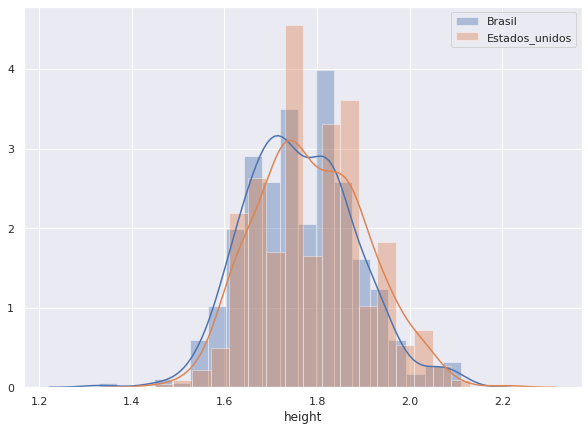

In [63]:
sns.distplot(brasil.height, label='Brasil')
sns.distplot(Estados_unidos.height, label='Estados_unidos')
plt.legend()

In [52]:
alpha = 0.05
brasil_contra_usa[1] > alpha

False

**Observation as amostratas nao sao iguais**

**Resposta Question 5**

In [53]:
def q5():
    brasil = df[df.nationality == "BRA"]
    Estados_unidos = df[df.nationality == "USA"]
    brasil_contra_usa = sct.ttest_ind(brasil.height, Estados_unidos.height, equal_var=False, nan_policy='omit')
    alpha = 0.05
    return bool(brasil_contra_usa[1] > alpha)

q5()

False


**Questão 6** 
Repita o procedimento da questão 5, mas agora entre as alturas de bra e can. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (True ou False).

**Calulo da media das alturas**

In [54]:
media_Altura_brasi = brasil.height.mean()
media_Altura_brasi

1.764033613445379

In [55]:
media_Altura_canada = canada.height.mean()
media_Altura_canada

1.7585937500000004

In [56]:
brasil_contra_canada= sct.ttest_ind(brasil.height, canada.height, equal_var=False, nan_policy='omit')
brasil_contra_canada

Ttest_indResult(statistic=0.6389304914365109, pvalue=0.5230827295440921)

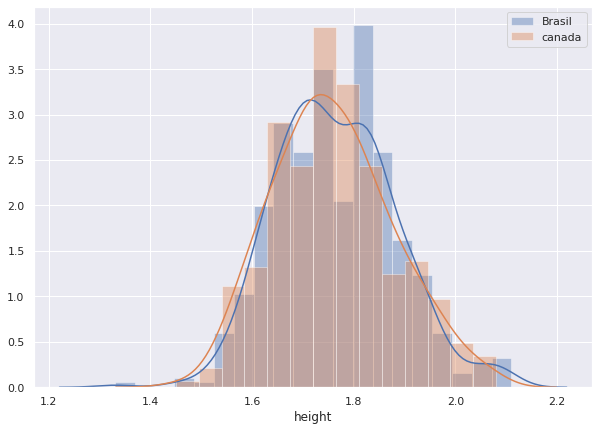

In [62]:
sns.distplot(brasil.height, label='Brasil')
sns.distplot(canada.height, label='canada')
plt.legend()

In [64]:
alpha = 0.05
brasil_contra_canada[1] > alpha

True

**Observation : Temos uma distribuiçao igual**

**Resposta question 6**

In [72]:
def q6():
    brasil = df[df.nationality == "BRA"]
    canada = df[df.nationality == "CAN"]
    brasil_contra_canada = sct.ttest_ind(brasil.height, canada.height, equal_var=False, nan_policy='omit')
    alpha = 0.05
    return bool(brasil_contra_canada[1] > alpha)

q6()

True

**Questão 7**
Repita o procedimento da questão 6, mas agora entre as alturas de usa e can. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

**Calulo da media das alturas**

In [66]:
media_Altura_usa = Estados_unidos.height.mean()
media_Altura_usa

1.7877678571428557

In [67]:
media_Altura_canada = brasil.height.mean()
media_Altura_canada

1.764033613445379

In [69]:
usa_contra_canada= sct.ttest_ind(Estados_unidos.height, canada.height, equal_var=False, nan_policy='omit')
usa_contra_canada

Ttest_indResult(statistic=3.516987632488539, pvalue=0.0004660129347389851)

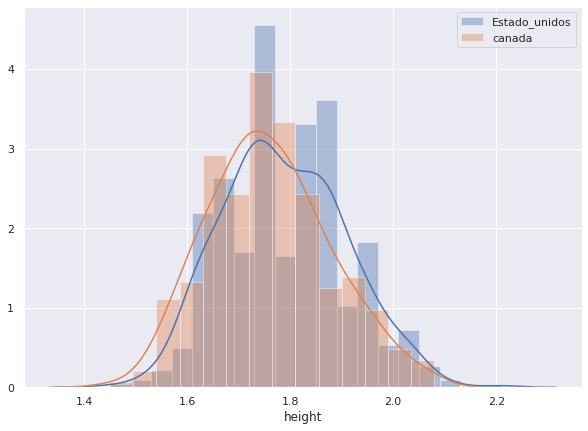

In [70]:
sns.distplot(Estados_unidos.height, label='Estado_unidos')
sns.distplot(canada.height, label='canada')
plt.legend()

In [71]:
alpha = 0.05
usa_contra_canada[1] > alpha

False

In [74]:
def q7():
    Estados_unidos = df[df.nationality == "USA"]
    canada = df[df.nationality == "CAN"]
    brasil_contra_canada = sct.ttest_ind(Estados_unidos.height, canada.height, equal_var=False, nan_policy='omit')
    alpha = 0.05
    return round(usa_contra_canada[1],8)

q7()

0.00046601

**Observation General**


1.   Os Atletas dos  Estados_Unidos têm uma maior representaçâo estatisticas quando observamos os graficos.
2.   Os Atlestas do Brasil e do canada têm uma representaçao estatistica igual quando observamos a comparaçao Brasil e canada

